In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()

data = pd.read_csv(list(uploaded.keys())[0])

data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin'].fillna('Unknown', inplace=True)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

data.drop(columns=['Name', 'Ticket'], inplace=True)

print(data.head())


Saving dataset.csv to dataset (2).csv
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Cabin  \
0            1         0       3    1  22.0      1      0   7.2500  Unknown   
1            2         1       1    0  38.0      1      0  71.2833      C85   
2            3         1       3    0  26.0      0      0   7.9250  Unknown   
3            4         1       1    0  35.0      1      0  53.1000     C123   
4            5         0       3    1  35.0      0      0   8.0500  Unknown   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


/tmp/ipython-input-1158012382.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-1158012382.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [5]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


In [9]:
data.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Cabin,148
Embarked,3


Text(0.5, 1.0, 'Missing values')

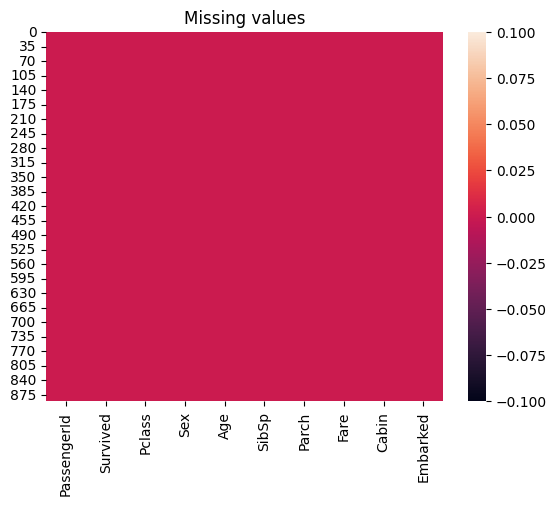

In [13]:
sns.heatmap(data.isnull(),cbar=True).set_title('Missing values')

In [14]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

cols = ['SibSp','Fare','Age']
X = data[cols]

imputed_value = IterativeImputer()
imputed_value.fit_transform(X)

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       ...,
       [ 1.    , 23.45  , 28.    ],
       [ 0.    , 30.    , 26.    ],
       [ 0.    ,  7.75  , 32.    ]])

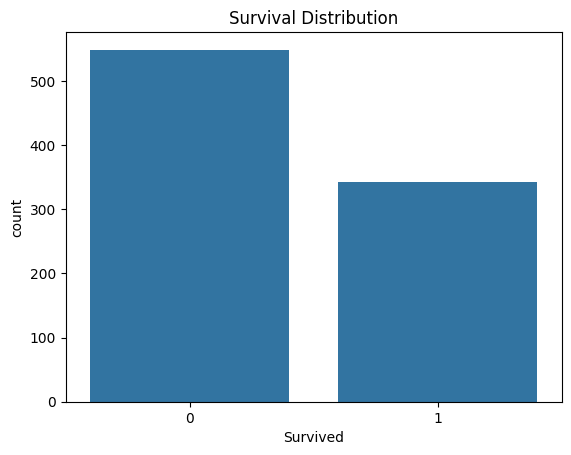

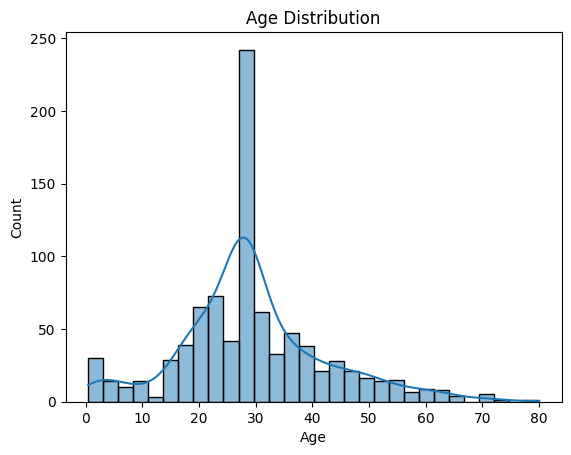

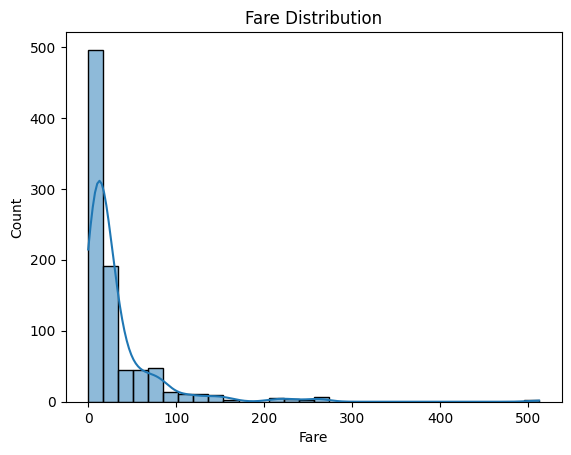

In [20]:
# EDA - Distribution of survival (Target variable)
sns.countplot(x='Survived', data=data)
plt.title('Survival Distribution')
plt.show()

# Age Distribution
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


# Fare Distribution
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()





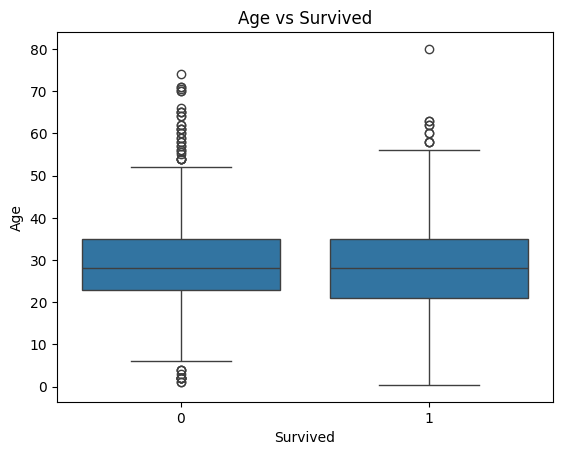

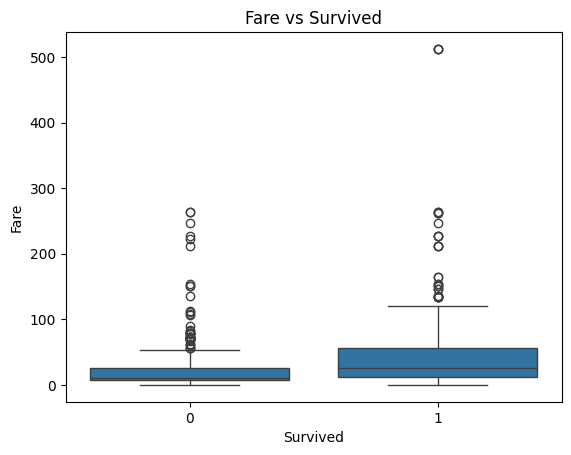

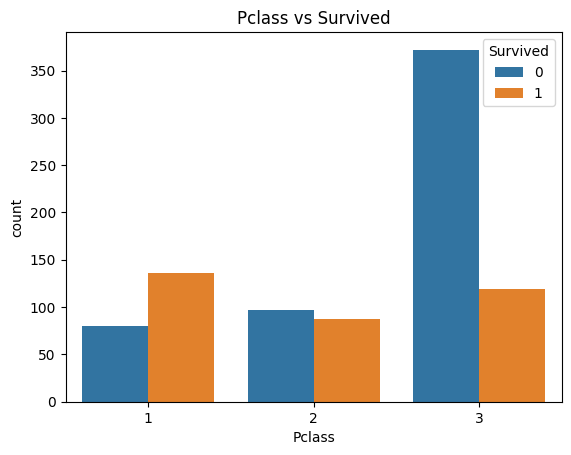

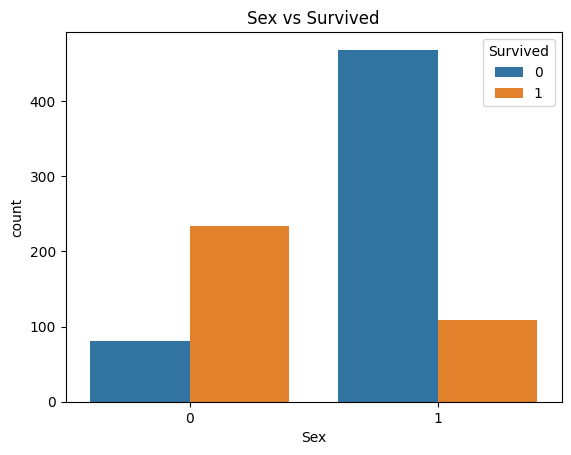

In [22]:
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age vs Survived')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare vs Survived')
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Pclass vs Survived')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Sex vs Survived')
plt.show()


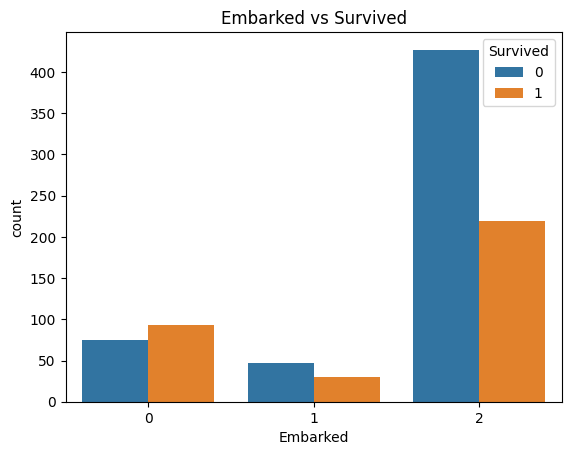

In [23]:
# Relationship between Embarked and Survived
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Embarked vs Survived')
plt.show()

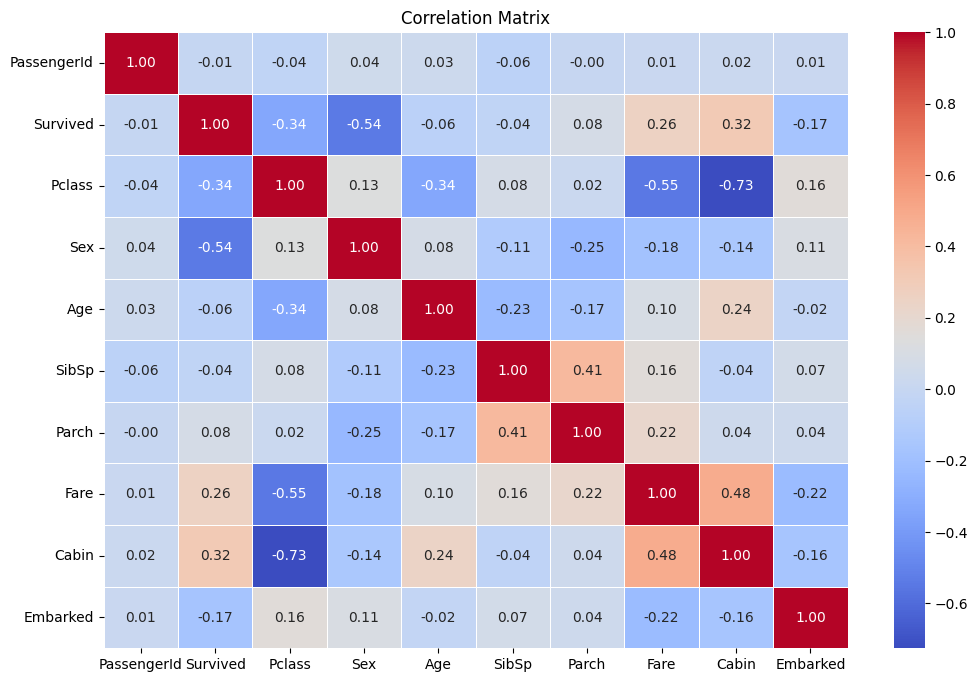

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


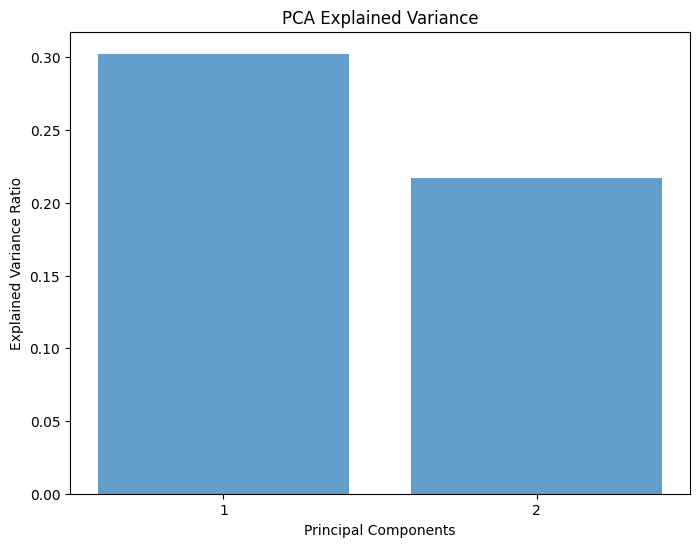

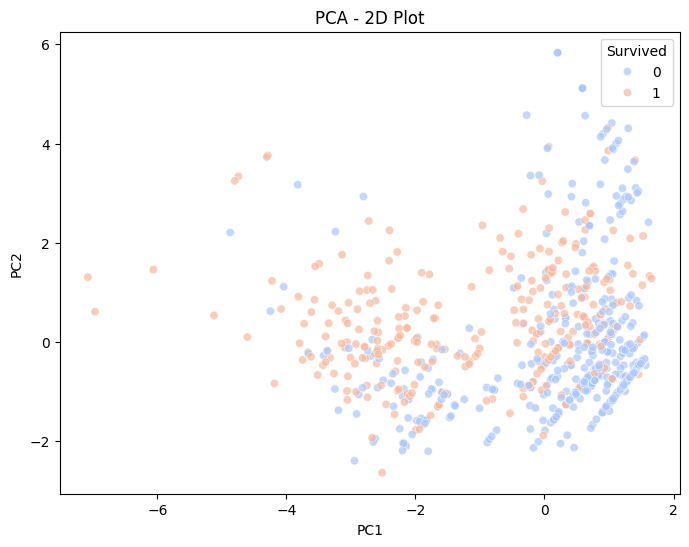

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# DROPPING two coloumns
X_pca = data.drop(columns=['Survived', 'PassengerId'])

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA(n_components=2)  # We will reduce to 2 components for visualization
X_pca_result = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.xticks(range(1, 3))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

pca_df = pd.DataFrame(X_pca_result, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=data['Survived'], palette='coolwarm', alpha=0.7)
plt.title('PCA - 2D Plot')
plt.show()


In [25]:
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)

#selecting features and target
X = data.drop(columns=['Survived', 'PassengerId'])
y = data['Survived']

# train test split - 80,20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #randomforest predictor is used
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Model Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.7933
Confusion Matrix:
[[88 17]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [26]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')


Cross-validation scores: [0.79888268 0.78651685 0.84269663 0.79213483 0.83146067]
Mean CV score: 0.8103383340656581


    Feature  Importance
1       Sex    0.264682
5      Fare    0.261606
2       Age    0.248449
0    Pclass    0.069702
3     SibSp    0.048875
4     Parch    0.037663
6     Cabin    0.035724
7  Embarked    0.033299


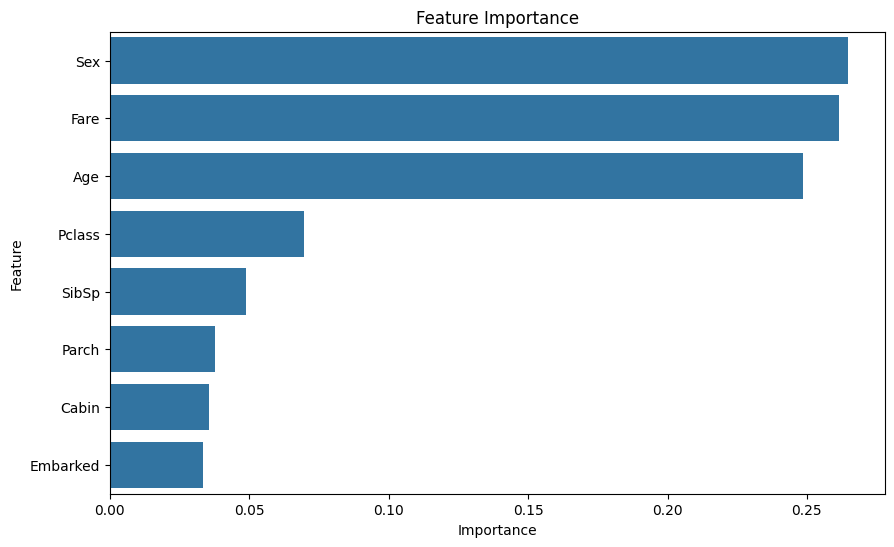

In [27]:
#feature importance
feature_importance = rf_model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print(importance_df.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [29]:
# Use the optimized Random Forest model to make predictions
y_pred_final = rf_model.predict(X_test)

# Display the predicted values alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_final})

print(predictions.head())

print(f'Prediction Accuracy: {accuracy_score(y_test, y_pred_final):.4f}')


     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          0
Prediction Accuracy: 0.7933


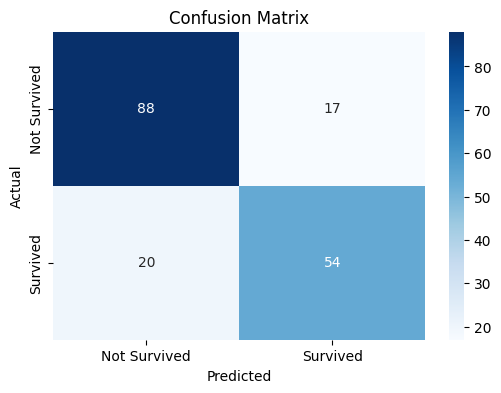

Confusion Matrix:
[[88 17]
 [20 54]]


In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_optimized = rf_model.predict(X_test)  #confusion matrix for understanding the results..
cm = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Confusion Matrix:")
print(cm)
